In [48]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('./data/workingData')

display(df)



,Unnamed: 0,country,Year,co2_including_luc,Cereal,Citrus Fruits,Fibre,Fruit,Vegetables,Sugar Crops,"Oilcrops, Cake","Oilcrops, Oil",Pulses,Roots and Tubers,Treenuts
0,0,Spain,1961,71.444,7501313.0,1963100.0,125501.00,8056170.0,5135084.0,4668000.0,123085.00,454410.81,705227.0,5033925.0,337261.0
1,1,Spain,1962,70.795,9274378.0,1411000.0,135918.00,7842627.0,5088416.0,3843000.0,131119.00,408366.28,755270.0,4263018.0,237906.0
2,2,Spain,1963,60.300,9418967.0,2087300.0,113091.00,9093705.0,5315694.0,3048000.0,112455.00,728444.63,750300.0,5184266.0,269686.0
3,3,Spain,1964,67.304,8306768.0,1915200.0,85473.00,10275272.0,5417800.0,3670000.0,94265.00,163003.84,625320.0,4342199.0,274529.0
4,4,Spain,1965,62.890,8872202.0,2021300.0,89752.00,9368335.0,5263390.0,4099000.0,100359.00,402577.22,529389.0,4146900.0,279338.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,Spain,2018,249.668,25348920.0,6778000.0,65308.19,20000020.0,12455120.0,2870910.0,570304.00,1910949.59,690650.0,2010930.0,555290.0
58,58,Spain,2019,231.262,20589030.0,6010040.0,68188.90,18317650.0,13259340.0,2752710.0,563230.00,1787917.14,403010.0,2259320.0,572410.0
59,59,Spain,2020,193.952,27320900.0,6696400.0,65974.68,19471070.0,12668790.0,2432840.0,557147.60,1852783.23,571680.0,2051830.0,642560.0
60,60,Spain,2021,210.310,25510560.0,6711940.0,65631.42,19031150.0,13535730.0,2506290.0,563575.92,1881779.99,444560.0,2081110.0,596290.0


MSE = 1008.2934424604921
MAE = 24.57515785037134
R-squared = 0.5780403870696982


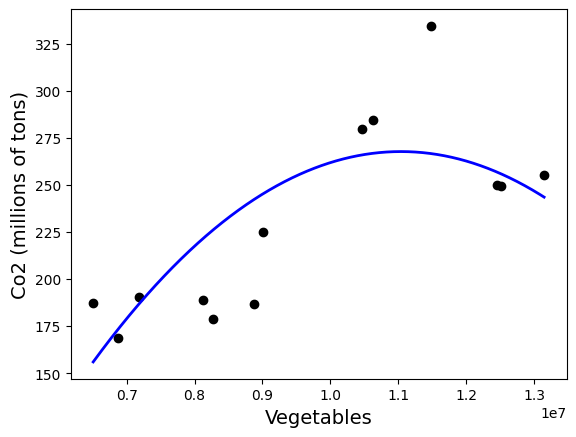

In [49]:
# TRY CHANGING TO DEGREE 3, MUCH BETTER PERFORMANCE
# TODO: use one-standard error method to determine which degree to use (see Zybooks 8.8)
test_p = .2
seed = 123

X = df[['Vegetables']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X_train.reshape(-1, 1))
polyModel = LinearRegression().fit(xPoly, y_train)
poly_test = polyFeatures.fit_transform(X_test.reshape(-1, 1))
y_pred = polyModel.predict(poly_test)



plt.scatter(X_test, y_test, color='black')
xDelta = np.linspace(X_test.min(), X_test.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Vegetables', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)

print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))


MSE = 902.1228186708631
MAE = 23.902991237775378
R-squared = 0.6224716145598996


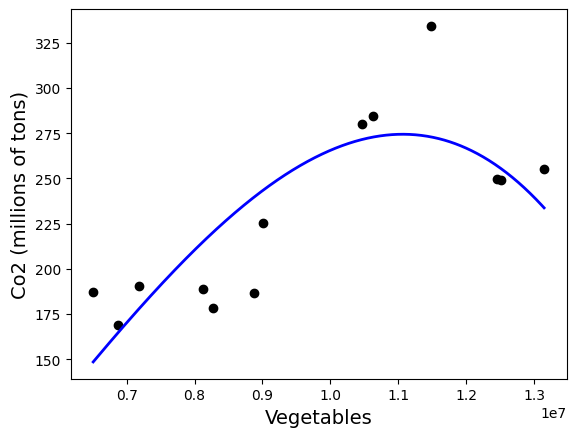

In [50]:
# DEGREE 3
test_p = .2
seed = 123

X = df[['Vegetables']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

polyFeatures = PolynomialFeatures(degree=3, include_bias=False)
xPoly = polyFeatures.fit_transform(X_train.reshape(-1, 1))
polyModel = LinearRegression().fit(xPoly, y_train)
poly_test = polyFeatures.fit_transform(X_test.reshape(-1, 1))
y_pred = polyModel.predict(poly_test)



plt.scatter(X_test, y_test, color='black')
xDelta = np.linspace(X_test.min(), X_test.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Vegetables', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)

print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))


k = 10:  1168.0394190831933
LOOCV:  1163.4025136677208


([<matplotlib.axis.XTick at 0x7f7740f2bf70>,
 [Text(0, 0, '10-fold'), Text(1, 0, 'LOOCV')])

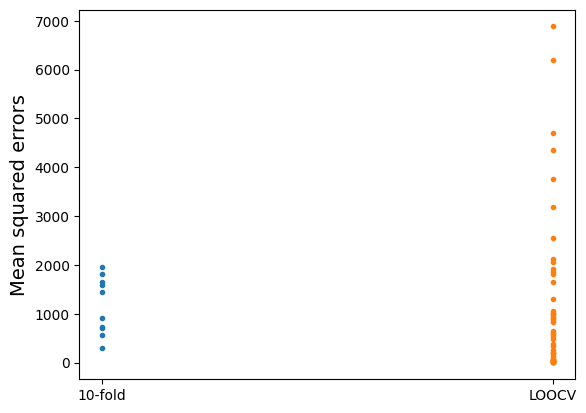

In [51]:

from sklearn.model_selection import cross_val_score


test_p = .2
seed = 123

X = df[['Vegetables']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X_train.reshape(-1, 1))
polyModel = LinearRegression().fit(xPoly, y_train)
poly_test = polyFeatures.fit_transform(X_test.reshape(-1, 1))
y_pred = polyModel.predict(poly_test)


ten_fold_scores = -cross_val_score(
    polyModel, xPoly, y_train, scoring='neg_mean_squared_error', cv=10
)

LOOCV_scores = -cross_val_score(polyModel, xPoly, y_train, scoring='neg_mean_squared_error', cv=49)
print('k = 10: ', np.mean(ten_fold_scores))
print('LOOCV: ', np.mean(LOOCV_scores))
plt.plot(np.zeros_like(ten_fold_scores), ten_fold_scores, '.')
plt.plot(np.zeros_like(LOOCV_scores) + 1, LOOCV_scores, '.')
plt.ylabel('Mean squared errors', fontsize=14)
plt.xticks([0, 1], ['10-fold', 'LOOCV'])

k = 10:  1103.4197701933651
LOOCV:  1087.7483726361959


([<matplotlib.axis.XTick at 0x7f7740d6c730>,
 [Text(0, 0, '10-fold'), Text(1, 0, 'LOOCV')])

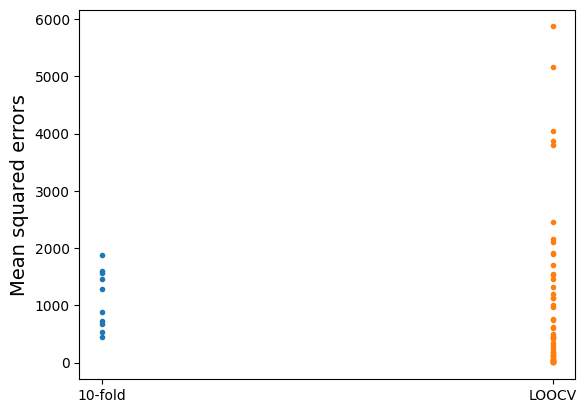

In [52]:

from sklearn.model_selection import cross_val_score


test_p = .2
seed = 123

X = df[['Vegetables']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

polyFeatures = PolynomialFeatures(degree=3, include_bias=False)
xPoly = polyFeatures.fit_transform(X_train.reshape(-1, 1))
polyModel = LinearRegression().fit(xPoly, y_train)
poly_test = polyFeatures.fit_transform(X_test.reshape(-1, 1))
y_pred = polyModel.predict(poly_test)


ten_fold_scores = -cross_val_score(
    polyModel, xPoly, y_train, scoring='neg_mean_squared_error', cv=10
)

LOOCV_scores = -cross_val_score(polyModel, xPoly, y_train, scoring='neg_mean_squared_error', cv=49)

print('k = 10: ', np.mean(ten_fold_scores))
print('LOOCV: ', np.mean(LOOCV_scores))
plt.plot(np.zeros_like(ten_fold_scores), ten_fold_scores, '.')
plt.plot(np.zeros_like(LOOCV_scores) + 1, LOOCV_scores, '.')
plt.ylabel('Mean squared errors', fontsize=14)
plt.xticks([0, 1], ['10-fold', 'LOOCV'])